In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
file_name = r"C:\Users\Sanjyot Bhure\Downloads\Clinic_Appointment_Data.csv"
df=pd.read_csv(file_name)
df.head()

,Date,Doctor,Specialty,Appointment Time,Wait Time (min),Consult Duration (min),No Show
0,2024-01-01,Dr. Shah,Pediatrics,11:15,4.69,9.44,0
1,2024-01-01,Dr. Mehta,Cardiology,14:45,1.70,16.59,1
2,2024-01-01,Dr. Iyer,General Medicine,16:00,0.60,16.40,0
3,2024-01-01,Dr. Rao,Orthopedics,9:45,12.31,20.05,0
4,2024-01-01,Dr. Rao,Orthopedics,13:30,0.21,12.10,0


In [18]:
df_shown = df[df["No Show"] == 0]
df_doc_grouped= df_shown.groupby("Doctor")
avg_wait = df_doc_grouped["Wait Time (min)"].mean().sort_values(ascending=False)
print(avg_wait)

Doctor
Dr. Iyer      10.751270
Dr. Rao       10.748444
Dr. Shah      10.422121
Dr. Mehta      9.471651
Dr. Kapoor     8.738416
Name: Wait Time (min), dtype: float64


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Dr. Iyer'),
  Text(1, 0, 'Dr. Rao'),
  Text(2, 0, 'Dr. Shah'),
  Text(3, 0, 'Dr. Mehta'),
  Text(4, 0, 'Dr. Kapoor')])

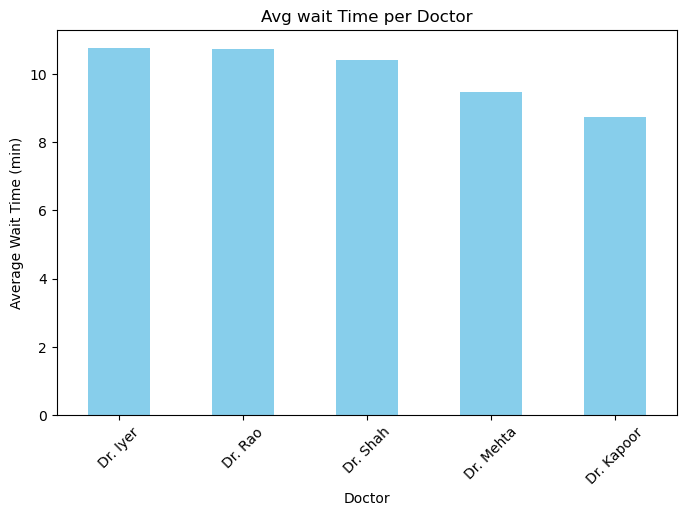

In [41]:
plt.figure(figsize=(8,5))
avg_wait.plot(kind="bar", color= "skyblue")
plt.title("Avg wait Time per Doctor")
plt.xlabel("Doctor")
plt.ylabel("Average Wait Time (min)")
plt.xticks(rotation=45)

In [24]:
no_show_stats = df.groupby("Doctor").agg(
    Total_Appointments=("No Show", "count"),
    No_Shows=("No Show", "sum")
)

no_show_stats["No_Show_%"] = 100 * no_show_stats["No_Shows"] / no_show_stats["Total_Appointments"]

no_show_stats_sorted = no_show_stats.sort_values("No_Show_%", ascending=False)
print(no_show_stats_sorted)


            Total_Appointments  No_Shows  No_Show_%
Doctor                                             
Dr. Mehta                  261        43  16.475096
Dr. Kapoor                 261        40  15.325670
Dr. Shah                   269        38  14.126394
Dr. Rao                    297        40  13.468013
Dr. Iyer                   279        35  12.544803


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Dr. Mehta'),
  Text(1, 0, 'Dr. Kapoor'),
  Text(2, 0, 'Dr. Shah'),
  Text(3, 0, 'Dr. Rao'),
  Text(4, 0, 'Dr. Iyer')])

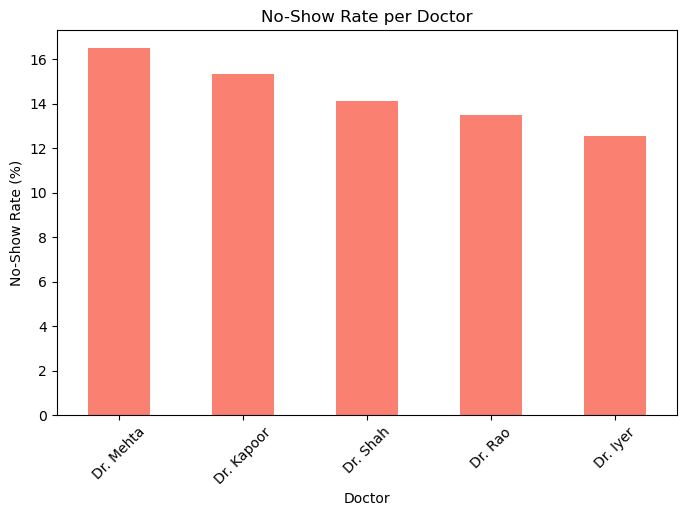

In [42]:
plt.figure(figsize=(8, 5))
no_show_stats_sorted["No_Show_%"].plot(kind="bar", color="salmon")
plt.title("No-Show Rate per Doctor")
plt.xlabel("Doctor")
plt.ylabel("No-Show Rate (%)")
plt.xticks(rotation=45)

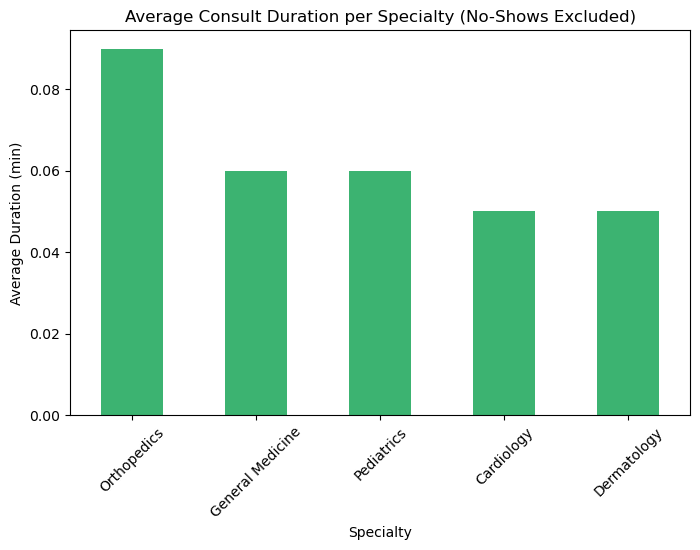

In [43]:
df_spec_grouped = df.groupby("Specialty")
df_spec_mean = df_spec_grouped["Wait Time (min)"].mean().sort_values(ascending=False)
df_spec_min = df_spec_grouped["Wait Time (min)"].min().sort_values(ascending=False)
df_spec_max = df_spec_grouped["Wait Time (min)"].max().sort_values(ascending=False)
# print(df_spec_mean)
# print("////////////////////////////////")
# print(df_spec_max)
# print("////////////////////////////////")
# print(df_spec_min)

plt.figure(figsize=(8, 5))
df_spec_min.plot(kind="bar", color="mediumseagreen")
plt.title("Average Consult Duration per Specialty (No-Shows Excluded)")
plt.xlabel("Specialty")
plt.ylabel("Average Duration (min)")
plt.xticks(rotation=45)
plt.show()

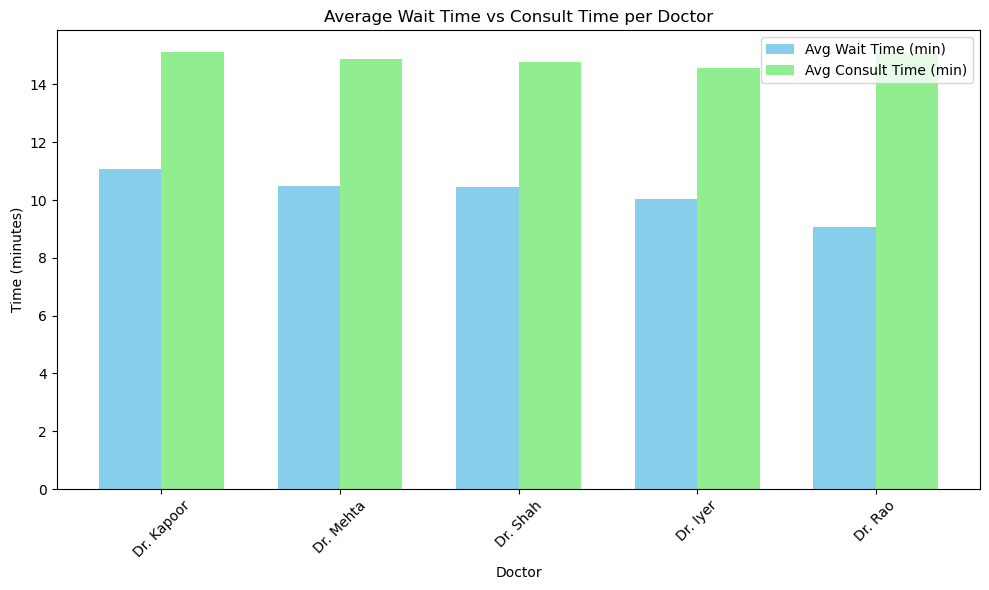

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# (Re)generate synthetic data for demonstration
np.random.seed(42)
dates = pd.date_range(start='2024-01-01', periods=60)
doctors = ['Dr. Mehta', 'Dr. Rao', 'Dr. Kapoor', 'Dr. Iyer', 'Dr. Shah']
specialties = ['Cardiology', 'Orthopedics', 'Dermatology', 'General Medicine', 'Pediatrics']

data = []
for date in dates:
    for _ in range(np.random.randint(15, 30)):
        doctor = np.random.choice(doctors)
        specialty = specialties[doctors.index(doctor)]
        appointment_time = f"{np.random.randint(9, 16)}:{np.random.choice(['00', '15', '30', '45'])}"
        wait_time = round(np.random.exponential(10), 2)
        consult_duration = round(np.random.normal(15, 5), 2)
        no_show = np.random.choice([0, 1], p=[0.85, 0.15])
        data.append([
            date.date(), doctor, specialty, appointment_time, wait_time,
            consult_duration, no_show
        ])

df = pd.DataFrame(data, columns=[
    'Date', 'Doctor', 'Specialty', 'Appointment Time', 'Wait Time (min)',
    'Consult Duration (min)', 'No Show'
])

# Filter for patients who showed up
df_filtered = df[df['No Show'] == 0]

# Calculate average times per doctor
avg_wait_time = df_filtered.groupby('Doctor')['Wait Time (min)'].mean()
avg_consult_time = df_filtered.groupby('Doctor')['Consult Duration (min)'].mean()

# Prepare plot data
comparison_df = pd.DataFrame({
    'Avg Wait Time (min)': avg_wait_time,
    'Avg Consult Time (min)': avg_consult_time
}).sort_values(by='Avg Wait Time (min)', ascending=False)

# Plot setup
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(comparison_df))

# Bars
bar1 = ax.bar(index, comparison_df['Avg Wait Time (min)'], bar_width, label='Avg Wait Time (min)', color='skyblue')
bar2 = ax.bar(index + bar_width, comparison_df['Avg Consult Time (min)'], bar_width, label='Avg Consult Time (min)', color='lightgreen')

# Labels and title
ax.set_xlabel('Doctor')
ax.set_ylabel('Time (minutes)')
ax.set_title('Average Wait Time vs Consult Time per Doctor')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(comparison_df.index, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

In [5]:
#There appears to be a positive correlation between consult duration and patient wait time—longer consultations tend to result in longer waits.

#The clinic should focus on better aligning appointment slot durations with actual consult times, 
#especially for doctors with the longest consult durations and wait times.

#Consider buffer slots or staggering appointments to minimize overlap and reduce patient wait.

In [10]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
file_name = r"C:\Users\Sanjyot Bhure\Downloads\Clinic_Appointment_Data.csv"
df=pd.read_csv(file_name)
df_filtered = df[df['No Show'] == 0]

# KPI calculations
avg_wait = df_filtered['Wait Time (min)'].mean()
no_show_rate = 100 * df['No Show'].mean()
patients_today = df['Date'].value_counts().max()
utilization = (len(df_filtered) / len(df)) * 100

# Show KPIs
st.title('Clinic Operations Dashboard')
col1, col2, col3, col4 = st.columns(4)
col1.metric("Avg Patient Wait Time", f"{avg_wait:.1f} min")
col2.metric("No-Show Rate", f"{no_show_rate:.1f}%")
col3.metric("Patients Served (Max Day)", patients_today)
col4.metric("Appointment Utilization", f"{utilization:.1f}%")

# Plot Avg Wait vs Consult Time per Doctor
avg_wait_time = df_filtered.groupby('Doctor')['Wait Time (min)'].mean()
avg_consult_time = df_filtered.groupby('Doctor')['Consult Duration (min)'].mean()

comparison_df = pd.DataFrame({
    'Avg Wait Time': avg_wait_time,
    'Avg Consult Time': avg_consult_time
})

st.subheader("Avg Wait Time vs Consult Time per Doctor")
st.bar_chart(comparison_df)

# Additional charts and filters can be added similarly


2025-05-30 12:52:12.311 
  command:

    streamlit run C:\Users\Sanjyot Bhure\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()